# Lab 6 Timeseries

Skills
- Reformat dates
- Extract parts of dates
- Visualize timeseries data

Data Source
- https://github.com/fivethirtyeight/uber-tlc-foil-response

Resources
- https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- https://docs.python.org/2/library/time.html

In [1]:
# import modules
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Part A: Formatting Dates

In [2]:
# read in data for uber from jul14 (uber-raw-data-jul14.csv), aug14 (uber-raw-data-aug14.csv), and sep14 (uber-raw-data-sep14.csv)

# print first few lines of each data set
jul14 = pd.read_csv('uber-raw-data-jul14.csv')
aug14= pd.read_csv('uber-raw-data-aug14.csv')
sep14= pd.read_csv('uber-raw-data-sep14.csv')

In [3]:
jul14.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [4]:
aug14.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [5]:
sep14.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [6]:
# Append/stack the 3 uber dataframes imported in the previous cell 
df = pd.concat([jul14,aug14,sep14], ignore_index=True)

In [7]:
# separate date from time using string split (that is, using the 'Date/Time' column, create two new columns, 'Date' & 'Time')
df['Date'] = df['Date/Time'].str.split(" ", expand = True)[0]
df['Time'] = df['Date/Time'].str.split(" ", expand = True)[1]


In [8]:
df

,Date/Time,Lat,Lon,Base,Date,Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,7/1/2014,0:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,7/1/2014,0:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,7/1/2014,0:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,7/1/2014,0:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,7/1/2014,0:20:00
...,...,...,...,...,...,...
2653527,9/30/2014 22:57:00,40.7668,-73.9845,B02764,9/30/2014,22:57:00
2653528,9/30/2014 22:57:00,40.6911,-74.1773,B02764,9/30/2014,22:57:00
2653529,9/30/2014 22:58:00,40.8519,-73.9319,B02764,9/30/2014,22:58:00
2653530,9/30/2014 22:58:00,40.7081,-74.0066,B02764,9/30/2014,22:58:00


In [9]:
# convert the values in the 'Date' column into the format Year-Month-Day, as in 2014-07-04
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))
df

,Date/Time,Lat,Lon,Base,Date,Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,0:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,0:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,0:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,0:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,0:20:00
...,...,...,...,...,...,...
2653527,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,22:57:00
2653528,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,22:57:00
2653529,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,22:58:00
2653530,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,22:58:00


In [10]:
# convert the values in the 'Time' column into the format 12hr:Min:Sec (i.e. 12 hour clock)
df['Time'] = df['Time'].apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S").strftime("%I:%M:%S"))
df

,Date/Time,Lat,Lon,Base,Date,Time
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,12:03:00
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,12:05:00
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,12:06:00
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,12:09:00
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,12:20:00
...,...,...,...,...,...,...
2653527,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,10:57:00
2653528,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,10:57:00
2653529,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,10:58:00
2653530,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,10:58:00


# Part B: Visualize Timeseries Data

## Visualize by date

In [11]:
# extract the day of the week from the 'Date' variable in the uber data set and save this as a new column called 'DayOfWeek'
# HINT: In the lecture, we extracted the hour from the time variable, using apply, lambda, and "hour". For this
# example, you should use apply, lambda and "weekday()" instead
df["DayOfWeek"] = df["Date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").weekday())
df

,Date/Time,Lat,Lon,Base,Date,Time,DayOfWeek
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,12:03:00,1
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,12:05:00,1
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,12:06:00,1
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,12:09:00,1
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,12:20:00,1
...,...,...,...,...,...,...,...
2653527,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,10:57:00,1
2653528,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,10:57:00,1
2653529,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,10:58:00,1
2653530,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,10:58:00,1


In [12]:
# aggregate the uber data set by day of the week (DayOfWeek) and count the number of rides per day of the week
# HINT: Use groupby (each row represents 1 ride, so you can use "Date" to identify 1 ride)
# HINT2: remember to reset the index and rename the columns

# print the first few rows

# To interpret the Day of Week remeber that 0 = Monday, 1 = Tuesday, 2 = Wednesday etc...


count_days = df[['DayOfWeek','Date']].groupby(['DayOfWeek']).agg('count')
count_days = count_days.reset_index() 
count_days = count_days.rename(columns={'Date': 'NumOfRides'})
count_days.head()

,DayOfWeek,NumOfRides
0,0,322110
1,1,407808
2,2,398346
3,3,425832
4,4,411789


<AxesSubplot: xlabel='DayOfWeek'>

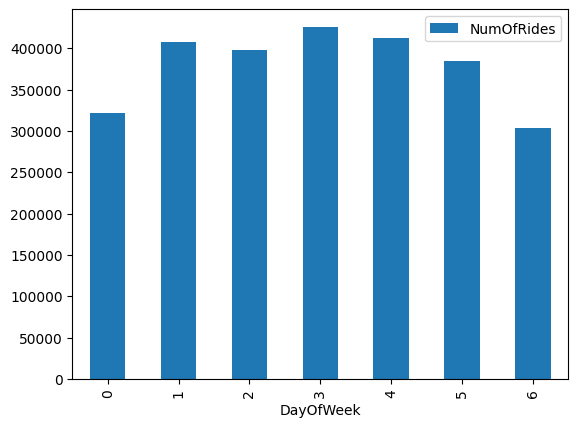

In [13]:
# create a barchart to display the number of trips per day of the week (DayOfWeek)
count_days.plot.bar(x = 'DayOfWeek', y ='NumOfRides')


In [14]:
# extract the hour from the Time variable in the uber data set and save this as a new column called "Hour"

df["Hour"] = df["Time"].apply(lambda x:datetime.datetime.strptime(x,"%I:%M:%S").hour)
df

,Date/Time,Lat,Lon,Base,Date,Time,DayOfWeek,Hour
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,2014-07-01,12:03:00,1,0
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2014-07-01,12:05:00,1,0
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,2014-07-01,12:06:00,1,0
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,2014-07-01,12:09:00,1,0
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,2014-07-01,12:20:00,1,0
...,...,...,...,...,...,...,...,...
2653527,9/30/2014 22:57:00,40.7668,-73.9845,B02764,2014-09-30,10:57:00,1,10
2653528,9/30/2014 22:57:00,40.6911,-74.1773,B02764,2014-09-30,10:57:00,1,10
2653529,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2014-09-30,10:58:00,1,10
2653530,9/30/2014 22:58:00,40.7081,-74.0066,B02764,2014-09-30,10:58:00,1,10


In [15]:
# aggregate the uber data set by hour and count the number of rides per hour
# HINT2: remember to reset the index and rename the columns

# print the first few rows


count_days = df[['Hour','Date']].groupby(['Hour']).agg('count')
count_days = count_days.reset_index() 
count_days = count_days.rename(columns={'Date': 'NumOfRides'})
count_days.head()

,Hour,NumOfRides
0,0,165736
1,1,158743
2,2,164013
3,3,185833
4,4,208597


<AxesSubplot: xlabel='Hour'>

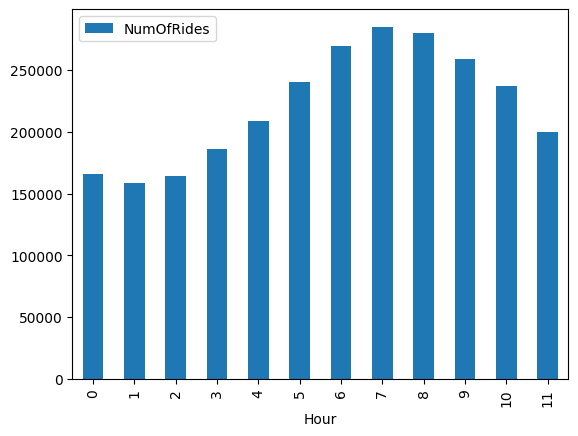

In [16]:
# create a barchart to display the number of trips per hour
count_days.plot.bar(x = 'Hour', y ='NumOfRides')

## Aggregate at different time periods by setting date as index

In [20]:
# tell python to use the date variable as the index for the uber data. Call this new dataframe uber_date_index
# by setting date as an index, we can then use special functions for aggregating datetime indices
df['Date'] = pd.to_datetime(df['Date'])
uber_date_index = df.set_index('Date')
uber_date_index

,Date/Time,Lat,Lon,Base,Time,DayOfWeek,Hour
Date,,,,,,,
2014-07-01,7/1/2014 0:03:00,40.7586,-73.9706,B02512,12:03:00,1,0
2014-07-01,7/1/2014 0:05:00,40.7605,-73.9994,B02512,12:05:00,1,0
2014-07-01,7/1/2014 0:06:00,40.7320,-73.9999,B02512,12:06:00,1,0
2014-07-01,7/1/2014 0:09:00,40.7635,-73.9793,B02512,12:09:00,1,0
2014-07-01,7/1/2014 0:20:00,40.7204,-74.0047,B02512,12:20:00,1,0
...,...,...,...,...,...,...,...
2014-09-30,9/30/2014 22:57:00,40.7668,-73.9845,B02764,10:57:00,1,10
2014-09-30,9/30/2014 22:57:00,40.6911,-74.1773,B02764,10:57:00,1,10
2014-09-30,9/30/2014 22:58:00,40.8519,-73.9319,B02764,10:58:00,1,10


In [23]:
# aggregate the uber_date_index dataframe by day to get the number of rides per day
# HINT: use resample
# HINT2: save this aggregate data frame as a new object e.g. uberperday

uberperday = uber_date_index.resample('D').count()
uberperday

,Date/Time,Lat,Lon,Base,Time,DayOfWeek,Hour
Date,,,,,,,
2014-07-01,21228,21228,21228,21228,21228,21228,21228
2014-07-02,26480,26480,26480,26480,26480,26480,26480
2014-07-03,21597,21597,21597,21597,21597,21597,21597
2014-07-04,14148,14148,14148,14148,14148,14148,14148
2014-07-05,10890,10890,10890,10890,10890,10890,10890
...,...,...,...,...,...,...,...
2014-09-26,37504,37504,37504,37504,37504,37504,37504
2014-09-27,39468,39468,39468,39468,39468,39468,39468
2014-09-28,29656,29656,29656,29656,29656,29656,29656


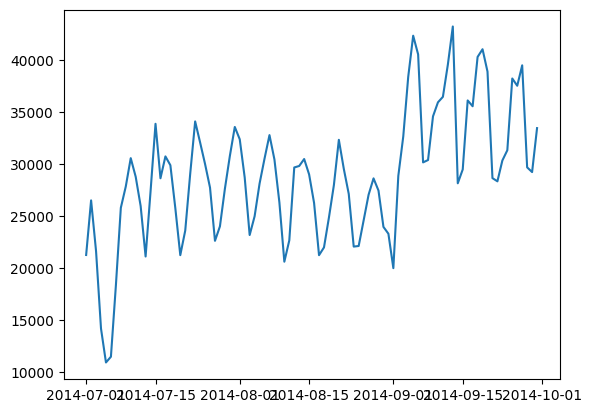

In [24]:
# create a line graph of the number of rides per day using the aggregated uber data (uberperday)
plt.plot(uberperday.index,uberperday['Time'])

In [37]:
# aggregate the uberperday data set by week to get the average number of rides per day for each week
# HINT: use resample
# HINT2: save this aggregate data frame as a new object e.g. uberperweek
uberperweek = uber_date_index.resample('W').count()
uberperweek['Time'].apply(lambda x: x/7)
uberperweek 

,Date/Time,Lat,Lon,Base,Time,DayOfWeek,Hour
Date,,,,,,,
2014-07-06,105786,105786,105786,105786,105786,105786,105786
2014-07-13,178171,178171,178171,178171,178171,178171,178171
2014-07-20,197310,197310,197310,197310,197310,197310,197310
2014-07-27,199003,199003,199003,199003,199003,199003,199003
2014-08-03,200028,200028,200028,200028,200028,200028,200028
2014-08-10,193581,193581,193581,193581,193581,193581,193581
2014-08-17,188940,188940,188940,188940,188940,188940,188940
2014-08-24,185694,185694,185694,185694,185694,185694,185694
2014-08-31,176883,176883,176883,176883,176883,176883,176883


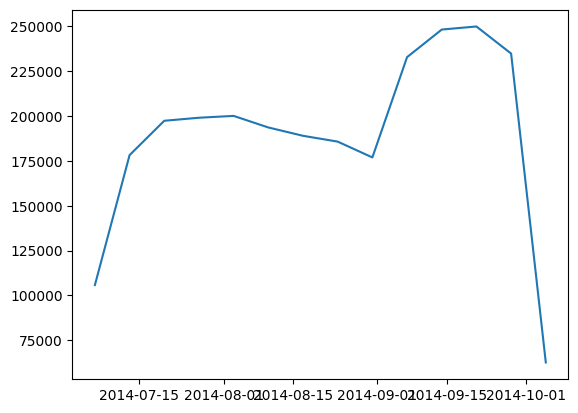

In [38]:
# create a line graph of the average number of rides per day per week using the aggregated uber data (uberperweek)
plt.plot(uberperweek.index,uberperweek['Time'])